In [ ]:
import pandas as pd

In [ ]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}

In [ ]:
df = pd.DataFrame(data = d)

In [ ]:
df.head(10)

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no
5,17,no
6,18,no
7,20,no
8,21,no
9,22,no


In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
finished_race = ['no', 'yes']

In [10]:
enc = OrdinalEncoder(categories = [finished_race])

In [11]:
df['completed_50m_ultra'] = enc.fit_transform(df[['completed_50m_ultra']])

In [12]:
df

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0


In [14]:
from matplotlib import pyplot as plt

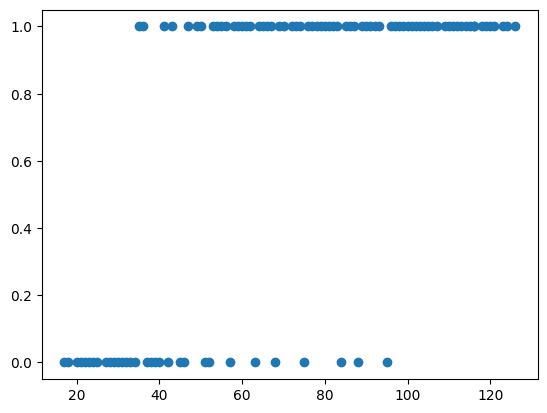

In [15]:
plt.scatter(df.miles_per_week, df.completed_50m_ultra)

In [16]:
import seaborn as sns

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

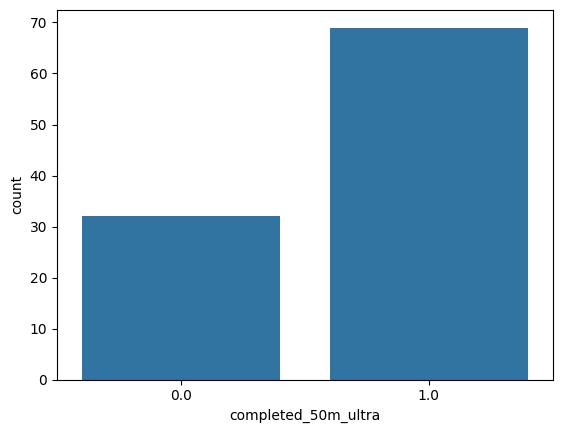

In [17]:
sns.countplot(x = 'completed_50m_ultra', data = df)

In [18]:
X = df.iloc[:, 0:1]

In [19]:
y = df.iloc[:, 1]

In [20]:
X

,miles_per_week
0,37
1,39
2,46
3,51
4,88
...,...
96,67
97,74
98,79
99,90


In [21]:
y

,completed_50m_ultra
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
96,1.0
97,1.0
98,1.0
99,1.0


In [22]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [26]:
X_train.shape, X_test.shape

((80, 1), (21, 1))

In [27]:
y_train.shape, y_test.shape

((80,), (21,))

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)
y_pred

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0.])

In [35]:
model.score(X_test, y_test)

0.9047619047619048

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
print(confusion_matrix(y_test, y_pred))

[[ 5  1]
 [ 1 14]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.93      0.93      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21

